In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Energy.csv", index_col=0, parse_dates=True)
df.head()

,IPG2211A2N
DATE,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4609
1939-05-01,3.4609


In [3]:
df.rename(columns = {'IPG2211A2N':'EergyIndex'}, inplace = True)
df.head()
  

,EergyIndex
DATE,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4609
1939-05-01,3.4609


In [4]:
df=df.dropna()

In [5]:
df.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='DATE', length=1015, freq=None)

In [6]:
### above "freq = None" so convert it into "MS" --> Month start frequency. More --> Pandas timeseries

df.index.freq='MS'


In [7]:
df.index

DatetimeIndex(['1939-01-01', '1939-02-01', '1939-03-01', '1939-04-01',
               '1939-05-01', '1939-06-01', '1939-07-01', '1939-08-01',
               '1939-09-01', '1939-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='DATE', length=1015, freq='MS')

In [8]:
df.head()

,EergyIndex
DATE,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4609
1939-05-01,3.4609


<Axes: xlabel='DATE'>

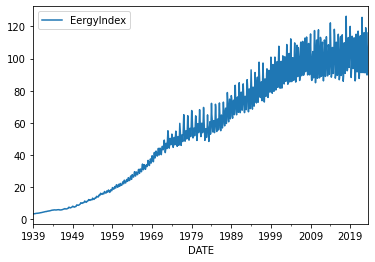

In [9]:
df.plot()

<Axes: xlabel='DATE'>

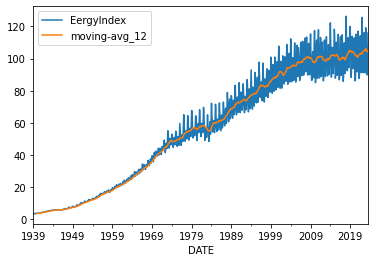

In [10]:
### Simple Moving Avg

df["moving-avg_12"] = df['EergyIndex'].rolling(window=12).mean()
df.plot()

In [11]:
### Simple Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df['EWMA12'] = SimpleExpSmoothing(df['EergyIndex']).fit(smoothing_level=2/(12+1), optimized=False).fittedvalues.shift(-1)

#### Triple exponential smoothing using Mul

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## trend & Seasonal--> trend going exponential and seasonal going proposal to time so "Mul"
df["triple_smooth_12"] = ExponentialSmoothing(df['EergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

C:\Users\CHS9NA\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='DATE'>

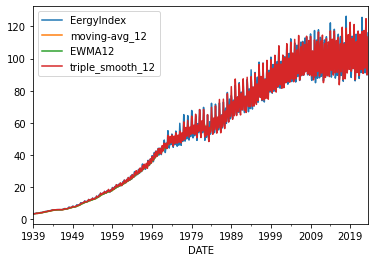

In [13]:
df.plot()

In [14]:
df.head(5)

,EergyIndex,moving-avg_12,EWMA12,triple_smooth_12
DATE,,,,
1939-01-01,3.3336,NaN,3.333600,3.456303
1939-02-01,3.3591,NaN,3.337523,3.314703
1939-03-01,3.4354,NaN,3.352581,3.263916
1939-04-01,3.4609,NaN,3.369246,3.263039
1939-05-01,3.4609,NaN,3.383346,3.292938


<Axes: xlabel='DATE'>

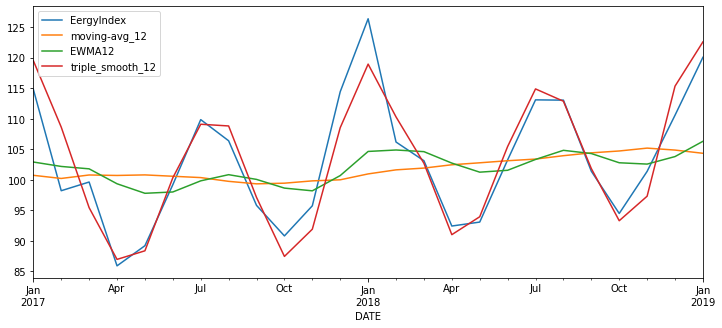

In [21]:
df['2017-01-01':'2019-01-01'].plot(figsize=(12,5))

In [15]:
### check the index error

df[['EergyIndex',' moving-avg_12' ,'EWMA-12', 'triple_smooth_12']].iloc[-100:].plot(figsize=(12,5))

KeyError: "[' moving-avg_12', 'EWMA-12'] not in index"